# A Python Quick Start Tutorial
# Lesson \#2 : More on Data Types & Loops
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources (reminder)

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Summary of our previous session

This is the short version of all we achieved working together during our previous session.  We will be using this for further examples.

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

In [2]:
# load needed functions from library module math
from math import sin,cos,radians

# define function(s)
def stressTransform(sigx, sigy, tauxy, theta):

    th = radians(theta)

    sx  = sigx * cos(th)**2 + sigy * sin(th)**2 + 2*tauxy * sin(th) * cos(th)
    sy  = sigx * sin(th)**2 + sigy * cos(th)**2 - 2*tauxy * sin(th) * cos(th)
    txy = (sigy - sigx) * sin(th) * cos(th) + tauxy * (cos(th)**2 - sin(th)**2) 
    
    return (sx,sy,txy)

# define some input parameters
sigma_x = 12.
sigma_y = -5.5
tau_xy = 3.5

# use that function
template = "sigma_x={:12.6f} ksi\nsigma_y={:12.6f} ksi\ntau_xy ={:12.6f} ksi\n"
print(template.format(*stressTransform(sigma_x, sigma_y, tau_xy, 0)))
print(template.format(*stressTransform(sigma_x, sigma_y, tau_xy, 25)))
print(template.format(*stressTransform(sigma_x, sigma_y, tau_xy, 180)))

sigma_x=   12.000000 ksi
sigma_y=   -5.500000 ksi
tau_xy =    3.500000 ksi

sigma_x=   11.555547 ksi
sigma_y=   -5.055547 ksi
tau_xy =   -4.453132 ksi

sigma_x=   12.000000 ksi
sigma_y=   -5.500000 ksi
tau_xy =    3.500000 ksi



# Exercise 1: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[1]
        tau_xy  --> stress[2]

**Avoid the above notation with 0, 1, and 2. Use dictionary instead. (psb)**

3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

**Implement**:
An alternative version of the `stressTransform(...)` function using a dictionary as defined under item 3. above.

In [3]:
from math import sin, cos, pi, radians
def stressTransform2(stress, theta):
    # YOUR CODE HERE ...
    
    sigx = stress['sigx']
    sigy = stress['sigy']
    tauxy = stress['tau']
    
    th = radians(theta)
    sxp = sigx * cos(th)**2 + sigy * sin(th)**2 + 2 * tauxy * sin(th) * cos(th)
    syp = sigx * sin(th)**2 + sigy * cos(th)**2 - 2 * tauxy * sin(th) * cos(th)
    txyp = (sigy - sigx) * sin(th) * cos(th) + tauxy * (cos(th)**2 - sin(th)**2)
    
    stress_out = {'sigx': sxp, 'sigy': syp, 'tau': txyp}
    # stress_out is another dictionary containing the transformed stress
    return stress_out

    # YOUR CODE


Initialize given stress

In [4]:
given_stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}

In [5]:
stress2 = stressTransform2(given_stress, 45)
print(stress2)
stress3 = stressTransform2(stress2, 45)
print(stress3)
stress4 = stressTransform2(stress3, 45)
print(stress4)
stress5 = stressTransform2(stress4, 45)
print(stress5)

{'sigx': 6.750000000000002, 'sigy': -0.2499999999999991, 'tau': -8.750000000000002}
{'sigx': -5.500000000000002, 'sigy': 12.000000000000005, 'tau': -3.500000000000001}
{'sigx': -0.24999999999999822, 'sigy': 6.750000000000004, 'tau': 8.750000000000005}
{'sigx': 12.000000000000009, 'sigy': -5.500000000000002, 'tau': 3.5000000000000013}


Add some nice print out for all transformation angles in the $\theta$-list 

In [6]:
theta_list = [0., 25., 45., 75., 90., 180.]
template = "sigma_x={sigx:12.6f} ksi\nsigma_y={sigy:12.6f} ksi\ntau_xy ={tau:12.6f} ksi\n"
template1 = """
         [ {sigx:12.6f}   {tau:12.6f} ]
sigma =  [                             ] ksi
         [ {tau:12.6f}   {sigy:12.6f} ]
"""

container = []
for theta in theta_list:
    outp_stress = stressTransform2(given_stress, theta)
    stress_out = {
        'sigx':outp_stress['sigx'],
        'sigy':outp_stress['sigy'],
        'tau':outp_stress['tau'],
    }
    container.append(stress_out)
    print(template.format(**stress_out))

for item in container:
    print(template1.format(**item))

#     print(stress_out)
#     print(template.format(sigx=stress['sigx'],sigy=stress['sigy'],tau=stress['tau']))

# YOUR CODE HERE ...

sigma_x=   12.000000 ksi
sigma_y=   -5.500000 ksi
tau_xy =    3.500000 ksi

sigma_x=   11.555547 ksi
sigma_y=   -5.055547 ksi
tau_xy =   -4.453132 ksi

sigma_x=    6.750000 ksi
sigma_y=   -0.250000 ksi
tau_xy =   -8.750000 ksi

sigma_x=   -2.577722 ksi
sigma_y=    9.077722 ksi
tau_xy =   -7.406089 ksi

sigma_x=   -5.500000 ksi
sigma_y=   12.000000 ksi
tau_xy =   -3.500000 ksi

sigma_x=   12.000000 ksi
sigma_y=   -5.500000 ksi
tau_xy =    3.500000 ksi


         [    12.000000       3.500000 ]
sigma =  [                             ] ksi
         [     3.500000      -5.500000 ]


         [    11.555547      -4.453132 ]
sigma =  [                             ] ksi
         [    -4.453132      -5.055547 ]


         [     6.750000      -8.750000 ]
sigma =  [                             ] ksi
         [    -8.750000      -0.250000 ]


         [    -2.577722      -7.406089 ]
sigma =  [                             ] ksi
         [    -7.406089       9.077722 ]


         [    -5.500000    

### Exercise 2 : Boolean variables

Badly formulated boolean expressions are a common source for faulty code.  This exercise shall emphasize how easy it is to misinterpret conditions.  Moreover, we will explore ways to test and improve our conditions.

**Your Task**:
predict the data type and value of the following boolean expressions.  Is this `True` or `False`?

    17 <= 365/21  and  'Monday' < 'Friday'

    'Monday'  < 'Friday'  or  cos( 3.1427 )

    (100 - 99) and sin( 3.14127/3 )  or  'Friday' > 'Monday'
    
    (100 - 99) and sin( 3.14127/3 )  and 'Friday' > 'Monday'
    
    (100 - 99) or sin( 3.14127/3 )  and 'Friday' > 'Monday'
    
    ( (100 - 99) or sin( 3.14127/3 ) )  and 'Friday' > 'Monday'
    
    ( (100 - 99) and sin( 3.14127/3 ) ) or 'Friday' > 'Monday'
    
Write a simple test function that tells you how the computer interprets the result:


In [7]:
17 <= 365/21  and  'Monday' > 'Friday' # testing if Monday is more than Friday for Mr. Computer

True

In [8]:
from math import sin

def test(cond):
    if cond:
        print("cond => {} => is True".format(cond))
    else:
        print("cond => {} => is False".format(cond))


In [9]:
# cd = 17 <= 365/21  and  'Monday' < 'Friday'

cd_LIST = [
    'Monday'  < 'Friday'  or  cos( 3.1427 ),
    
    (100 - 99) and sin( 3.14127/3 )  or  'Friday' > 'Monday',
    
    (100 - 99) and sin( 3.14127/3 )  and 'Friday' > 'Monday',
    
    (100 - 99) or sin( 3.14127/3 )  and 'Friday' > 'Monday',
    
    ( (100 - 99) or sin( 3.14127/3 ) )  and 'Friday' > 'Monday',
    
    ( (100 - 99) and sin( 3.14127/3 ) ) or 'Friday' > 'Monday'];

print(cd_LIST)
for cd in cd_LIST:
    test(cd)

[-0.9999993868920265, 0.865971623177473, False, 1, False, 0.865971623177473]
cond => -0.9999993868920265 => is True
cond => 0.865971623177473 => is True
cond => False => is False
cond => 1 => is True
cond => False => is False
cond => 0.865971623177473 => is True


In [10]:
want_a_beer = True
ans = want_a_beer or not want_a_beer
print(ans)

True


In [11]:
if 'False':
    print('True')
else:
    print('False')

True


### Exercise 3 : Writing efficient loops in python

**Given**:
Three lists containing $\theta$, $y_1=\sin\theta$, and $y_2=\cos\theta$.


In [12]:
list(range(1,10,3))

[1, 4, 7]

In [13]:
from math import pi, sin, cos

# set a parameter: N is an integer >= 1
N = 50

# initialize the lists
theta = []
y1 = []
y2 = []

# run this to populate the lists
th = 0.0

for i in range(N+1):
    theta.append(th)
    y1.append(sin(th))
    y2.append(cos(th))
    th += pi/N

In [14]:
theta

[0.0,
 0.06283185307179587,
 0.12566370614359174,
 0.1884955592153876,
 0.25132741228718347,
 0.3141592653589793,
 0.37699111843077515,
 0.439822971502571,
 0.5026548245743668,
 0.5654866776461627,
 0.6283185307179585,
 0.6911503837897544,
 0.7539822368615502,
 0.816814089933346,
 0.8796459430051419,
 0.9424777960769377,
 1.0053096491487337,
 1.0681415022205296,
 1.1309733552923256,
 1.1938052083641215,
 1.2566370614359175,
 1.3194689145077134,
 1.3823007675795094,
 1.4451326206513053,
 1.5079644737231013,
 1.5707963267948972,
 1.6336281798666932,
 1.6964600329384891,
 1.759291886010285,
 1.822123739082081,
 1.884955592153877,
 1.947787445225673,
 2.0106192982974687,
 2.0734511513692646,
 2.1362830044410606,
 2.1991148575128565,
 2.2619467105846525,
 2.3247785636564484,
 2.3876104167282444,
 2.4504422698000403,
 2.5132741228718363,
 2.576105975943632,
 2.638937829015428,
 2.701769682087224,
 2.76460153515902,
 2.827433388230816,
 2.890265241302612,
 2.953097094374408,
 3.01592894744620

In [15]:
y1

[0.0,
 0.06279051952931337,
 0.12533323356430426,
 0.18738131458572463,
 0.2486898871648548,
 0.3090169943749474,
 0.3681245526846779,
 0.4257792915650726,
 0.4817536741017152,
 0.5358267949789965,
 0.587785252292473,
 0.6374239897486896,
 0.6845471059286885,
 0.7289686274214114,
 0.770513242775789,
 0.8090169943749472,
 0.844327925502015,
 0.8763066800438636,
 0.9048270524660196,
 0.9297764858882515,
 0.9510565162951536,
 0.9685831611286312,
 0.9822872507286887,
 0.9921147013144779,
 0.9980267284282716,
 1.0,
 0.9980267284282716,
 0.9921147013144778,
 0.9822872507286885,
 0.9685831611286309,
 0.9510565162951532,
 0.929776485888251,
 0.9048270524660191,
 0.876306680043863,
 0.8443279255020144,
 0.8090169943749467,
 0.7705132427757884,
 0.7289686274214106,
 0.6845471059286876,
 0.6374239897486885,
 0.5877852522924718,
 0.5358267949789951,
 0.48175367410171366,
 0.4257792915650709,
 0.3681245526846761,
 0.3090169943749454,
 0.24868988716485266,
 0.18738131458572238,
 0.1253332335643019,


In [16]:
y2

[1.0,
 0.9980267284282716,
 0.9921147013144779,
 0.9822872507286887,
 0.9685831611286311,
 0.9510565162951535,
 0.9297764858882515,
 0.9048270524660196,
 0.8763066800438636,
 0.8443279255020152,
 0.8090169943749475,
 0.7705132427757894,
 0.7289686274214117,
 0.6845471059286888,
 0.6374239897486899,
 0.5877852522924734,
 0.5358267949789968,
 0.4817536741017153,
 0.42577929156507266,
 0.36812455268467786,
 0.3090169943749473,
 0.24868988716485455,
 0.1873813145857243,
 0.12533323356430381,
 0.06279051952931286,
 -6.049014748177263e-16,
 -0.06279051952931407,
 -0.125333233564305,
 -0.1873813145857255,
 -0.2486898871648557,
 -0.3090169943749484,
 -0.36812455268467903,
 -0.42577929156507355,
 -0.4817536741017162,
 -0.5358267949789975,
 -0.5877852522924741,
 -0.6374239897486907,
 -0.6845471059286897,
 -0.7289686274214126,
 -0.7705132427757903,
 -0.8090169943749485,
 -0.8443279255020161,
 -0.8763066800438645,
 -0.9048270524660204,
 -0.9297764858882521,
 -0.9510565162951542,
 -0.96858316112863

**Your Task**:
Write a loop that prints a table

~~~
theta   sin(theta)    cos(theta)
...
~~~

1. Assume you do not know how many elements are in those lists => you'll have to figure it out
2. use as few variables as possible
3. The shortest working solution requires only two lines of code (more are OK, of course).

**Hint**: 
If you got time left, check out the `zip` command.

In [17]:
print('    theta,      y1,      y2')    

# MATLAB-kind code
N = min(len(theta), len(y1), len(y2)) 
# print(N)
for i in range(N):
    print(f'{theta[i]:8.4f} {y1[i]:8.4f} {y2[i]:8.4f}')

    theta,      y1,      y2
  0.0000   0.0000   1.0000
  0.0628   0.0628   0.9980
  0.1257   0.1253   0.9921
  0.1885   0.1874   0.9823
  0.2513   0.2487   0.9686
  0.3142   0.3090   0.9511
  0.3770   0.3681   0.9298
  0.4398   0.4258   0.9048
  0.5027   0.4818   0.8763
  0.5655   0.5358   0.8443
  0.6283   0.5878   0.8090
  0.6912   0.6374   0.7705
  0.7540   0.6845   0.7290
  0.8168   0.7290   0.6845
  0.8796   0.7705   0.6374
  0.9425   0.8090   0.5878
  1.0053   0.8443   0.5358
  1.0681   0.8763   0.4818
  1.1310   0.9048   0.4258
  1.1938   0.9298   0.3681
  1.2566   0.9511   0.3090
  1.3195   0.9686   0.2487
  1.3823   0.9823   0.1874
  1.4451   0.9921   0.1253
  1.5080   0.9980   0.0628
  1.5708   1.0000  -0.0000
  1.6336   0.9980  -0.0628
  1.6965   0.9921  -0.1253
  1.7593   0.9823  -0.1874
  1.8221   0.9686  -0.2487
  1.8850   0.9511  -0.3090
  1.9478   0.9298  -0.3681
  2.0106   0.9048  -0.4258
  2.0735   0.8763  -0.4818
  2.1363   0.8443  -0.5358
  2.1991   0.8090  -0.5878


In [18]:
print('\n   theta     y1       y2  ')

for item in zip(theta, y1, y2):
    print('{:8.4f} {:8.4f} {:8.4f}'.format(*item))


   theta     y1       y2  
  0.0000   0.0000   1.0000
  0.0628   0.0628   0.9980
  0.1257   0.1253   0.9921
  0.1885   0.1874   0.9823
  0.2513   0.2487   0.9686
  0.3142   0.3090   0.9511
  0.3770   0.3681   0.9298
  0.4398   0.4258   0.9048
  0.5027   0.4818   0.8763
  0.5655   0.5358   0.8443
  0.6283   0.5878   0.8090
  0.6912   0.6374   0.7705
  0.7540   0.6845   0.7290
  0.8168   0.7290   0.6845
  0.8796   0.7705   0.6374
  0.9425   0.8090   0.5878
  1.0053   0.8443   0.5358
  1.0681   0.8763   0.4818
  1.1310   0.9048   0.4258
  1.1938   0.9298   0.3681
  1.2566   0.9511   0.3090
  1.3195   0.9686   0.2487
  1.3823   0.9823   0.1874
  1.4451   0.9921   0.1253
  1.5080   0.9980   0.0628
  1.5708   1.0000  -0.0000
  1.6336   0.9980  -0.0628
  1.6965   0.9921  -0.1253
  1.7593   0.9823  -0.1874
  1.8221   0.9686  -0.2487
  1.8850   0.9511  -0.3090
  1.9478   0.9298  -0.3681
  2.0106   0.9048  -0.4258
  2.0735   0.8763  -0.4818
  2.1363   0.8443  -0.5358
  2.1991   0.8090  -0.5878


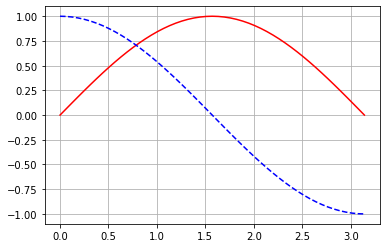

In [19]:
import matplotlib.pyplot as plt

plt.plot(theta, y1, '-r')
plt.plot(theta, y2, '--b')
plt.grid()
plt.show()


Note the important trick:

Loop over **items** in a list, NOT by index!  This makes code more compact and much better readable.

### Exercise 4: Looping over dictionaries

**Given**:
A dictionary `your_course` is given as follows (please do a `shift-enter` to initialize it)

In [20]:
your_course = {
               'department':'CEE',
               'group':'CESG',
               'number':'505 A&B',
               'complexity':10,
               'workload':0,
               'credits':3,
               'instructor':'Dr Peter'
              }

**Your tasks**:
1. Write a loop to print all keys, one per line

In [21]:
for k in your_course.keys():
    print("{} => {}".format(k, your_course[k]))

department => CEE
group => CESG
number => 505 A&B
complexity => 10
workload => 0
credits => 3
instructor => Dr Peter


2. Change complexity to 6 and workload to 8

In [22]:
your_course['complexity'] = 6
your_course['workload'] = 8

print(your_course)

{'department': 'CEE', 'group': 'CESG', 'number': '505 A&B', 'complexity': 6, 'workload': 8, 'credits': 3, 'instructor': 'Dr Peter'}


3. copy and modify the loop from 1. to print "key: value", one per line

In [23]:
for k in your_course.keys():
    print("{:12s}: {}".format(k, your_course[k]))

department  : CEE
group       : CESG
number      : 505 A&B
complexity  : 6
workload    : 8
credits     : 3
instructor  : Dr Peter


4. Write a condition that checks if `your_course` has a field named `'expected_grade'`.
    - If the field DOES exist, print **"Field exists with value of {:3.1f}".format(_the value associated with that key_)"**
    - If the field DOES NOT exist, create it and assign a sensible value, the print **"Field created with value of {:3.1f}".format(_the value associated with that key_)"**

In [26]:
keyExists = False

# for k in your_course.keys():
#     if k == 'expected_grade':
#         print("Field exists with value of {:3.1f}".format(your_course[k]))
#         keyExists = True
#         break
#     else: 
#         continue
    
# if not keyExists:
#     your_course['expected_grade'] = 4.2
#     print("Field created with value of {:3.1f}".format(your_course['expected_grade']))
    
    
if 'expected_grade' in your_course:
    print("Field exists with value of {:3.1f}".format(your_course[k]))
else:
    your_course['expected_grade'] = 4.2
    print("Field created with value of {:3.1f}".format(your_course['expected_grade']))
    

Field created with value of 4.2


Execute the above code again to verify that the new key/value pair was added

In [24]:
# just copy the code from two cells above
for k in your_course.keys():
    print("{:12s}: {}".format(k, your_course[k]))

department  : CEE
group       : CESG
number      : 505 A&B
complexity  : 6
workload    : 8
credits     : 3
instructor  : Dr Peter


In [5]:
# repeat the code that prints key/value pairs


department: CEE
group: CESG
number: 505 A&B
complexity: 10
workload: 0
credits: 3
instructor: Dr Peter
expected_grade: 4.2


## Homework questions

We can all learn from your questions!